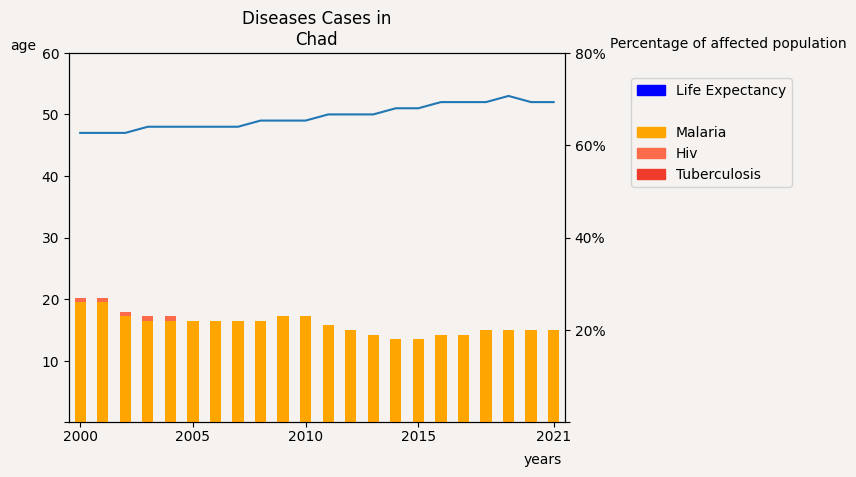

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from Diseases import CoutnCasesPercentage
from GiraVettori import rotate

f = open("/workspace/VS/DataSet/LifeExpGrosso.csv", "r")
lifeExp = []
line = f.readline()
elments = line.split(",")
graphColor = "#f6f2ef"
while line != "":
    if elments[0] == "Chad" and elments[1] == "2021":
        for j in range (0, 22, 1):
            lifeExp.append(int(float(elments[3])))
            line = f.readline()
            elments = line.split(",")
    else:
        line = f.readline()
        elments = line.split(",")
f.close()
years = []
for i in range (2000,2022,1):
    years.append(i)
casesH, casesM, casesT = CoutnCasesPercentage()
casesH = casesH[22:44]
casesM = casesM[22:44]
casesT = casesT[22:44]
casesH = rotate(casesH)
casesM = rotate(casesM)
casesT = rotate(casesT)
lifeExp = rotate(lifeExp)


df = pd.DataFrame({'y1': lifeExp, 'H': casesH, 'M': casesM, 'T': casesT, 'years': years })

fig, ax1 = plt.subplots(facecolor=graphColor)
ax2 = ax1.twinx()
#set colore
fig.set_facecolor(graphColor)
ax1.set_facecolor(graphColor)
ax2.set_facecolor(graphColor)
# Primo grafico (linea)
ax1.set_ylim(0, 60)
ax1.set_yticks([0, 10, 20, 30, 40, 50, 60], labels = ['', '10', '20', '30', '40', '50', '60'])
ax1.set_ylabel("age", rotation='horizontal', loc='top')
df['y1'].plot(kind='line', ax=ax1)

# Secondo grafico (barre)
ax2.set_ylim(0, 80)
ax2.set_yticks([0, 20, 40, 60, 80], labels = ['', '20%', '40%', '60%', '80%'] )
ax2.text(34, 82, "Percentage of affected population", rotation='horizontal', ha='right', va='center')
df[['M', 'H', 'T']].plot(kind='bar', color=['orange', '#fb6a4a', '#ef3b2c'], stacked=True, ax=ax2)

# Impostazioni per l'asse x
plt.xticks(ticks=[0, 5, 10, 15, 21], labels=['', '', '', '', ''])
plt.text(20.5, -9, "\nyears", rotation='horizontal', ha='center')
plt.text(0, -4, "2000", rotation='horizontal', ha='center')
plt.text(5, -4, "2005", rotation='horizontal', ha='center')
plt.text(10, -4, "2010", rotation='horizontal', ha='center')
plt.text(15, -4, "2015", rotation='horizontal', ha='center')
plt.text(21, -4, "2021", rotation='horizontal', ha='center')

# Legenda
LE = mpatches.Patch(color='blue', label='Life Expectancy')
NL = mpatches.Patch(color=graphColor, label='')
H = mpatches.Patch(color='#fb6a4a', label='Hiv')
M = mpatches.Patch(color='orange', label='Malaria')
T = mpatches.Patch(color='#ef3b2c', label='Tuberculosis')
plt.legend(handles=[LE, NL, M, H, T], ncol=1, bbox_to_anchor=(1.12, 0.95), loc='upper left', facecolor=graphColor)

# Titolo
plt.title("Diseases Cases in\nChad")
# Visualizza la figura
plt.show()